<a href="https://colab.research.google.com/github/J0SAL/Learning-DL/blob/main/codebasics/6.%20image_classification_ann_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
# google it
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) #for size
    plt.imshow(X[index]) # for plotting
    plt.xlabel(classes[y[index]]) #for label

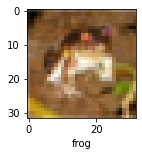

In [9]:
plot_sample(X_train, y_train, 0)

# Normalizing the training data

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# ANN

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.8114 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6209 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5400 - accuracy: 0.4573
Epoch 4/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4807 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4312 - accuracy: 0.4949


In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.47      0.51      1000
           1       0.35      0.87      0.50      1000
           2       0.42      0.26      0.32      1000
           3       0.33      0.44      0.38      1000
           4       0.45      0.38      0.41      1000
           5       0.58      0.17      0.26      1000
           6       0.49      0.59      0.53      1000
           7       0.73      0.33      0.45      1000
           8       0.51      0.67      0.58      1000
           9       0.50      0.34      0.41      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



# CNN

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4748 - accuracy: 0.4694
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1043 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9712 - accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8856 - accuracy: 0.6945
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8202 - accuracy: 0.7148
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7675 - accuracy: 0.7325
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7174 - accuracy: 0.7511
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6754 - accuracy: 0.7636
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6367 - accuracy: 0.7780
Epoch 10/10
1563/1563 [==============================] - 60s 38m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9189 - accuracy: 0.7024


[0.9189258813858032, 0.7024000287055969]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.43042266e-05, 3.37534857e-07, 1.37463940e-04, 5.80633044e-01,
        2.15523643e-04, 4.17544365e-01, 1.95359811e-04, 5.55271341e-04,
        6.64323394e-04, 2.00265276e-05],
       [7.05061927e-02, 2.89039254e-01, 3.51455201e-05, 2.01663653e-07,
        8.50199285e-05, 4.47122233e-08, 1.63707337e-09, 6.20691139e-07,
        6.00492299e-01, 3.98412384e-02],
       [4.76285927e-02, 6.11943364e-01, 9.17134050e-04, 2.91848992e-04,
        2.36918032e-03, 4.61045456e-05, 2.31516678e-05, 1.12749774e-04,
        3.17593545e-01, 1.90743990e-02],
       [3.24972242e-01, 9.41636693e-03, 1.74549781e-03, 4.34902067e-05,
        6.96388334e-02, 8.22991842e-06, 3.67943289e-06, 1.78181053e-05,
        5.93939185e-01, 2.14672444e-04],
       [8.11270468e-07, 5.63555068e-06, 5.25873341e-03, 9.83332936e-03,
        1.24527648e-01, 1.34089764e-03, 8.58596087e-01, 6.41697079e-06,
        4.29555599e-04, 8.70522285e-07]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 8, 6]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

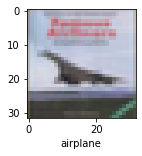

In [19]:
# actual
plot_sample(X_test, y_test,3)

In [20]:
# once that i got
classes[y_classes[3]]

'ship'

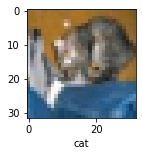

In [26]:
# actual
plot_sample(X_test, y_test,0)

In [24]:
# once that i got
classes[y_classes[0]]

'cat'